In [30]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.datasets import make_moons
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from mlxtend.plotting import plot_decision_regions
from tensorflow.keras.optimizers import Adam


In [31]:
x,y=make_moons(n_samples=100,noise=0.25,random_state=10)

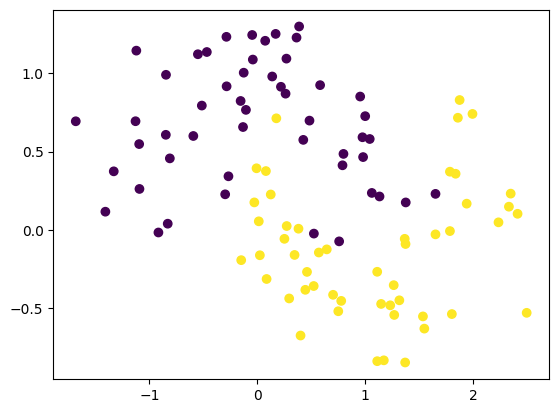

In [32]:
plt.scatter(x[:,0],x[:,1],c=y)
plt.show()

In [33]:
model1=Sequential()
model1.add(Dense(128,activation='relu',input_dim=2))
model1.add(Dense(128,activation='relu'))
model1.add(Dense(1,activation='sigmoid'))

C:\Users\Ashish Kumar Singh\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [34]:
model1.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                      │ (None, 128)                 │             384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 17,025 (66.50 KB)

 Trainable params: 17,025 (66.50 KB)

 Non-trainable params: 0 (0.00 B)

In [35]:
adam=Adam(learning_rate=0.01)
model1.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
history=model1.fit(x,y,epochs=1000,validation_split=0.2,verbose=1)

Epoch 1/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 107ms/step - accuracy: 0.7133 - loss: 0.6727 - val_accuracy: 0.7500 - val_loss: 0.6261
Epoch 2/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.8820 - loss: 0.6103 - val_accuracy: 0.7500 - val_loss: 0.5831
Epoch 3/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8406 - loss: 0.5612 - val_accuracy: 0.7500 - val_loss: 0.5475
Epoch 4/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.8406 - loss: 0.5212 - val_accuracy: 0.7500 - val_loss: 0.5174
Epoch 5/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.8250 - loss: 0.4869 - val_accuracy: 0.7500 - val_loss: 0.4901
Epoch 6/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8367 - loss: 0.4513 - val_accuracy: 0.7500 - val_loss: 0.4635
Epoch 7/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8367 - loss: 0.4204 - val_accuracy: 0.7500 - val_loss: 0.4382
Epoch 8/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8625 - loss: 0.3700 - val_accuracy: 0.7500 - 

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 13s 1ms/step


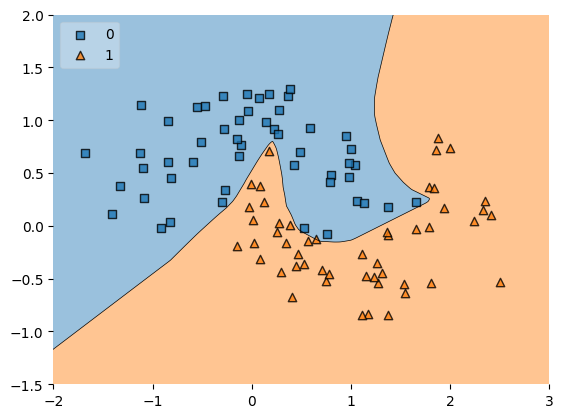

In [36]:
plot_decision_regions(x,y.astype('int'),clf=model1,legend=2)
plt.xlim(-2,3)
plt.ylim(-1.5,2)
plt.show()
plt.show()

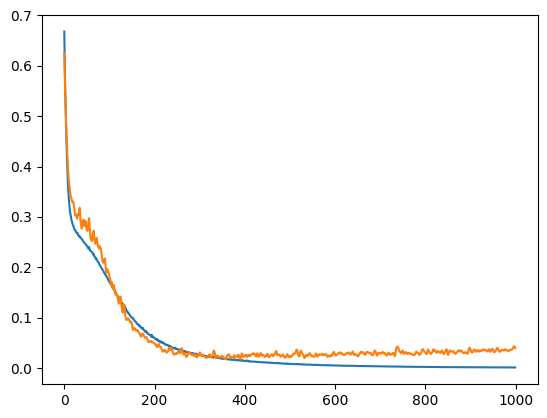

In [37]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

In [38]:
model2=Sequential()
model2.add(Dense(128,input_dim=2,activation='relu',kernel_regularizer=tensorflow.keras.regularizers.l2(0.01)))
model2.add(Dense(128,activation='relu',kernel_regularizer=tensorflow.keras.regularizers.l2(0.01)))
model2.add(Dense(1,activation='sigmoid'))


In [47]:
model2.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_11 (Dense)                     │ (None, 128)                 │             384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 51,077 (199.52 KB)

 Trainable params: 17,025 (66.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 34,052 (133.02 KB)

In [39]:
adam=Adam(learning_rate=0.01)
model2.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
history=model2.fit(x,y,epochs=1000,validation_split=0.2,verbose=1)

Epoch 1/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 106ms/step - accuracy: 0.7969 - loss: 1.9536 - val_accuracy: 0.7500 - val_loss: 1.8725
Epoch 2/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8578 - loss: 1.8481 - val_accuracy: 0.7500 - val_loss: 1.7863
Epoch 3/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8344 - loss: 1.7553 - val_accuracy: 0.7500 - val_loss: 1.7059
Epoch 4/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8500 - loss: 1.6704 - val_accuracy: 0.7500 - val_loss: 1.6298
Epoch 5/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8031 - loss: 1.6044 - val_accuracy: 0.7500 - val_loss: 1.5586
Epoch 6/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8031 - loss: 1.5251 - val_accuracy: 0.7500 - val_loss: 1.4914
Epoch 7/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.8055 - loss: 1.4543 - val_accuracy: 0.7500 - val_loss: 1.4292
Epoch 8/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8172 - loss: 1.3896 - val_accuracy: 0.7500 - 

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step


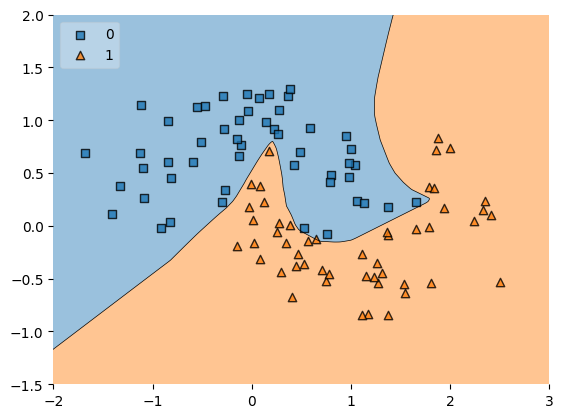

In [40]:
plot_decision_regions(x,y.astype('int'),clf=model1,legend=2)
plt.xlim(-2,3)
plt.ylim(-1.5,2)
plt.show()
plt.show()

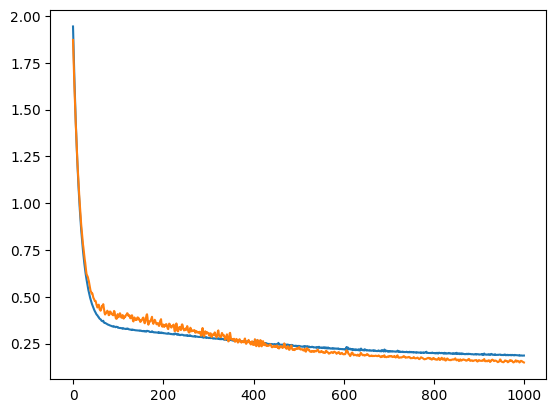

In [41]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

In [45]:
model1_weight_layer1=model1.get_weights()[0]
model2_weight_layer1=model2.get_weights()[0]
model1_weight_layer1

array([[ 2.42691383e-01, -2.97529280e-01,  6.95272982e-02,
         3.82096991e-02,  4.89596389e-02,  2.32830405e-01,
         3.05021536e-02,  2.05397326e-02,  1.97985232e-01,
        -4.61935192e-01,  2.91486573e-03,  2.31287584e-01,
        -2.42086977e-01, -3.90229911e-01,  6.13102764e-02,
         1.23972118e-01, -3.24293196e-01,  4.32642475e-02,
         7.16316625e-02, -3.16581428e-01,  2.05945164e-01,
         2.63321310e-01, -7.40894139e-01, -3.31224412e-01,
        -2.62197286e-01,  1.96283404e-02,  6.62691053e-03,
        -6.37545362e-02,  6.24170415e-02,  2.73904186e-02,
         1.13834150e-01, -7.10041374e-02,  1.67999864e-01,
        -4.66604024e-01, -1.57786310e-01, -4.40080255e-01,
        -4.45407361e-01,  2.53570348e-01,  1.78730994e-01,
        -3.29342395e-01,  5.87085320e-04,  2.34093681e-01,
         2.24981293e-01, -4.01549220e-01, -2.96991795e-01,
        -4.33555454e-01,  2.13729292e-01, -2.81466931e-01,
         1.70425385e-01,  1.63093120e-01, -4.15833294e-0

<Axes: >

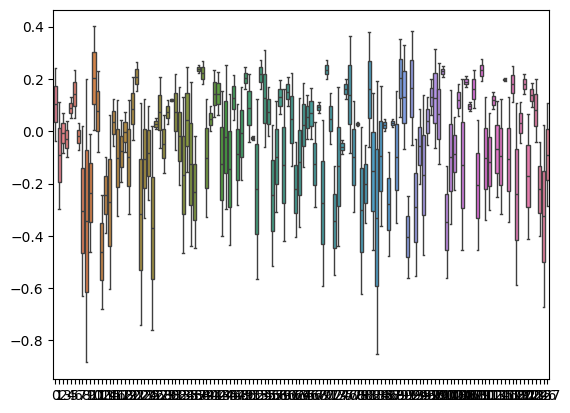

In [46]:
sns.boxplot(model1_weight_layer1)